In [1]:
from dataclasses import dataclass
import os
import pickle
import sys

import pandas as pd
import numpy as np

from natsort import natsorted

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl

import umap
from sklearn.manifold import TSNE

import abutils

from scab.pl import loupe_cmap

from scatterplot import scatter

## load data

In [2]:
seqs = abutils.io.read_csv('/BALM-paper/figure2-umap/lc-coherence_test-unique_annotated.csv')
pairs = abutils.pair.assign_pairs(seqs, id_key='pair_id')
pdict = {p.name: p for p in pairs}

In [3]:
@dataclass
class ModelOutput:
    name: str
    chain: str
    mean_final_layer_embedding: np.ndarray

In [4]:
with open('./balmMoE_outputs_20k.pkl', 'rb') as f:
    outputs = pickle.load(f)

## transform_data

In [5]:
hdata = {o.name: o.mean_final_layer_embedding for o in outputs if o.chain == 'heavy'}
hdf = pd.DataFrame(hdata).T

ldata = {o.name: o.mean_final_layer_embedding for o in outputs if o.chain == 'light'}
ldf = pd.DataFrame(ldata).T

## UMAPs

In [6]:
hreducer = umap.UMAP()
hembedding = hreducer.fit_transform(hdf)

In [7]:
lreducer = umap.UMAP()
lembedding = lreducer.fit_transform(ldf)

In [8]:
heavies = [pdict[p].heavy for p in hdf.index.values]
lights = [pdict[p].light for p in ldf.index.values]

### VH genes

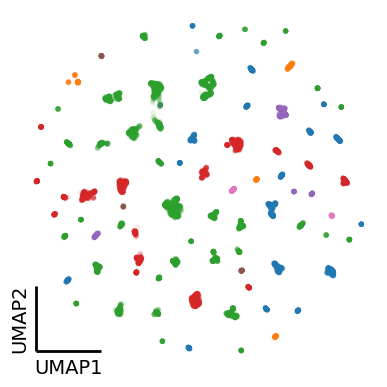

In [9]:
vh_fams = [h['v_gene'].split('-')[0] for h in heavies]
vh_order = [f'IGHV{i}' for i in range(1, 8)]

scatter(
    x=hembedding[:, 0],
    y=hembedding[:, 1],
    hue=vh_fams,
    hue_order=vh_order,
    size=15,
    alpha=0.1,
    hide_legend=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[4, 4],
    # show=True
    equal_axes=False,
    figfile='./umap_balmMoE_heavy-test-seqs_vgene-colored_scatterplot_small.pdf'
)
plt.show()

## VH mutations

In [10]:
def get_grey_zero_cmap(cmap):
    base_cmap = mpl.cm.get_cmap(cmap).copy()
    cropped_cmap = base_cmap(np.linspace(0.1, 1, 255))
    cmap_colors = [np.array([0.8, 0.8, 0.8, 1.0])] + list(cropped_cmap)
    return mpl.colors.LinearSegmentedColormap.from_list("mycmap", cmap_colors)

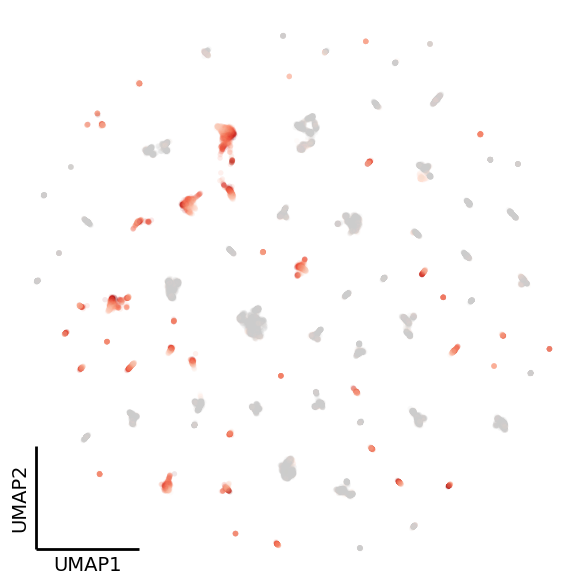

In [11]:
vh_muts = [float(min(50, h['v_mutation_count'])) for h in heavies]
mut_cmap = get_grey_zero_cmap('YlOrRd')
mut_cmap = get_grey_zero_cmap('Reds')


scatter(
    x=hembedding[:, 0],
    y=hembedding[:, 1],
    hue=vh_muts,
    cmap=mut_cmap,
    size=15,
    alpha=0.1,
    hide_legend=True,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./umap_balmMoE_heavy-test-seqs_mutation-colored_scatterplot.pdf'

)

## VL genes

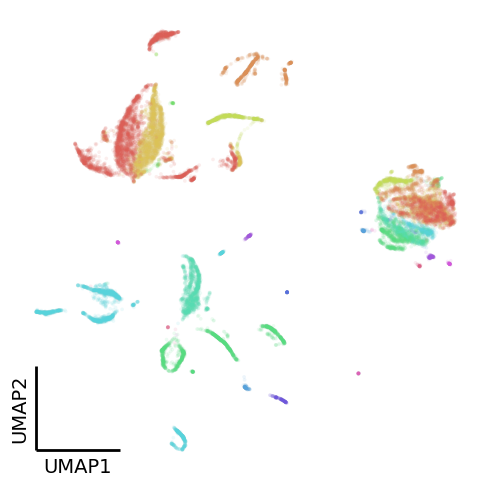

In [12]:
vl_fams = [l['v_gene'].split('-')[0].rstrip('D') for l in lights]
vl_order = natsorted(set(vl_fams))

scatter(
    x=lembedding[:, 0],
    y=lembedding[:, 1],
    hue=vl_fams,
    hue_order=vl_order,
    color=sns.hls_palette(len(vl_order)),
    size=7,
    alpha=0.1,
    hide_legend=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[5, 5],
    # show=True
    equal_axes=False,
    figfile='./umap_balmMoE_light-test-seqs_vgene-colored_scatterplot_small.pdf'
)

## VL locus

<Figure size 400x400 with 0 Axes>

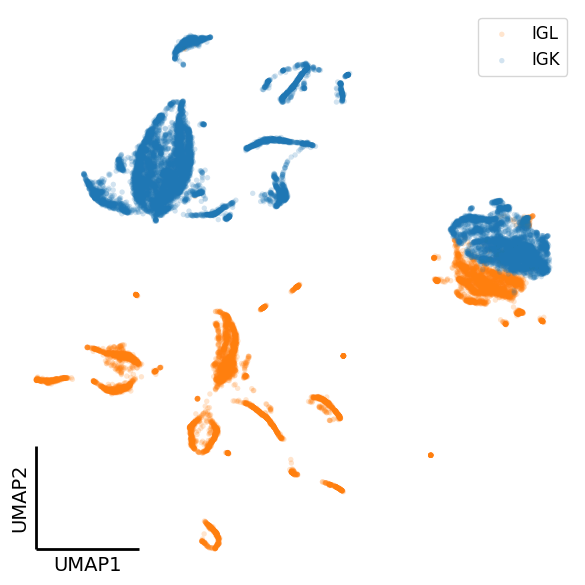

In [13]:
vl_locus = [l['locus'] for l in lights]
vl_order = natsorted(set(vl_locus))

plt.figure(figsize=[4, 4])

scatter(
    x=lembedding[:, 0],
    y=lembedding[:, 1],
    hue=vl_locus,
    hue_order=vl_order,
    # palette=sns.hls_palette(len(vl_order)),
    size=15,
    alpha=0.2,
    hide_legend=False,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./umap_balmMoE_light-test-seqs_locus-colored_scatterplot.pdf'
)

## VL mutations

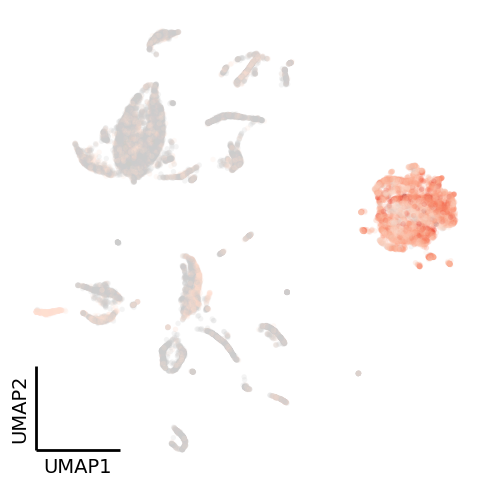

In [14]:
vl_muts = [float(min(50, l['v_mutation_count'])) for l in lights]
mut_cmap = get_grey_zero_cmap('YlOrRd')
mut_cmap = get_grey_zero_cmap('Reds')


scatter(
    x=lembedding[:, 0],
    y=lembedding[:, 1],
    hue=vl_muts,
    cmap=mut_cmap,
    size=15,
    alpha=0.2,
    hide_legend=True,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[5, 5],
    # show=True
    equal_axes=False,
    figfile='./umap_balmMoE_light-test-seqs_mutation-colored_scatterplot.pdf'
)

## tsne

In [15]:
tsne = TSNE()
htsne = tsne.fit_transform(hdf)

In [16]:
tsne = TSNE()
ltnse = tsne.fit_transform(ldf)

## VH genes

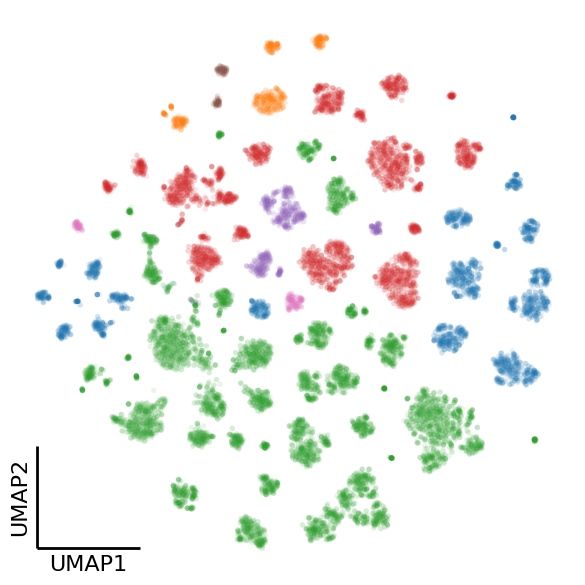

In [17]:
vh_fams = [h['v_gene'].split('-')[0] for h in heavies]
vh_order = [f'IGHV{i}' for i in range(1, 8)]

scatter(
    x=htsne[:, 0],
    y=htsne[:, 1],
    hue=vh_fams,
    hue_order=vh_order,
    size=15,
    alpha=0.1,
    hide_legend=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=16,
    ylabel_fontsize=16,
    figsize=[6, 6],
    # show=True,
    equal_axes=False,
    figfile='./tsne_balmMoE_heavy-test-seqs_vgene-colored_scatterplot_with-legend.pdf'
)

ax = plt.gca()
plt.show()

## VH Mutations

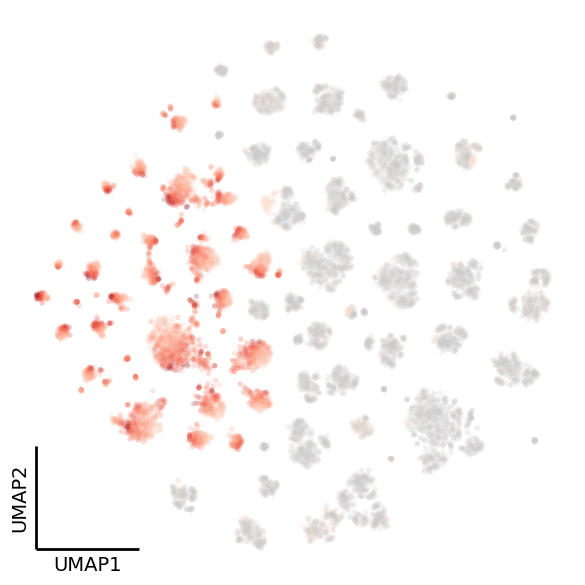

In [18]:
vh_muts = [float(min(50, h['v_mutation_count'])) for h in heavies]
mut_cmap = get_grey_zero_cmap('YlOrRd')
mut_cmap = get_grey_zero_cmap('Reds')


scatter(
    x=htsne[:, 0],
    y=htsne[:, 1],
    hue=vh_muts,
    cmap=mut_cmap,
    size=15,
    alpha=0.1,
    hide_legend=True,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./tsne_balmMoE_heavy-test-seqs_mutation-colored_scatterplot.pdf'
)

## VL genes

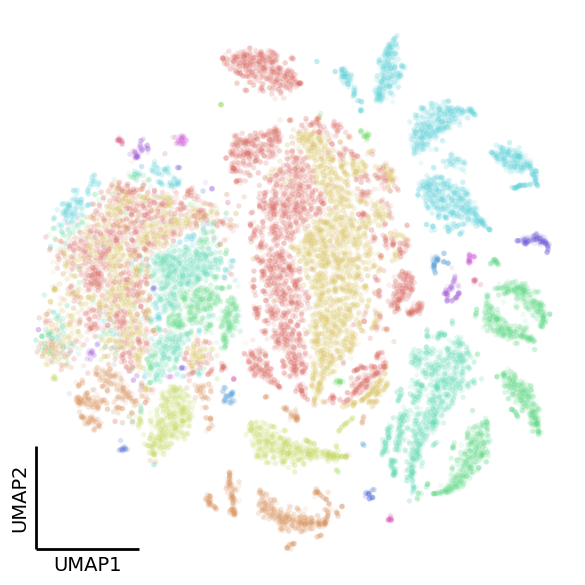

In [19]:
vl_fams = [l['v_gene'].split('-')[0].rstrip('D') for l in lights]
vl_order = natsorted(set(vl_fams))

scatter(
    x=ltnse[:, 0],
    y=ltnse[:, 1],
    hue=vl_fams,
    hue_order=vl_order,
    color=sns.hls_palette(len(vl_order)),
    size=15,
    alpha=0.1,
    hide_legend=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./tsne_shuffled-Bigmodel_light-test-seqs_vgene-colored_scatterplot_small.pdf'
)

## VL Mutations

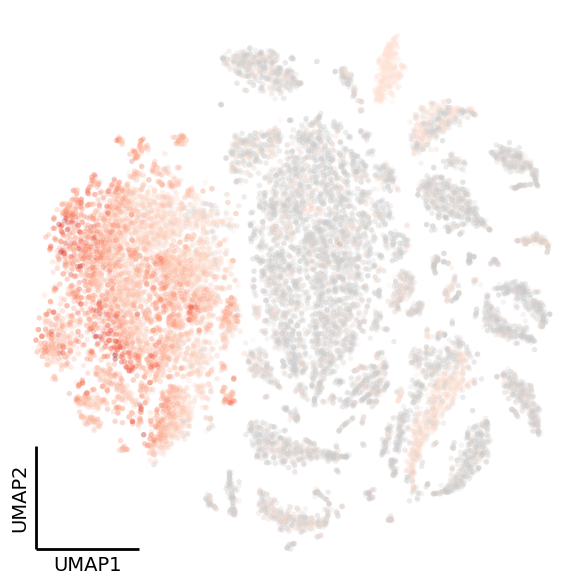

In [20]:
vl_muts = [float(min(50, l['v_mutation_count'])) for l in lights]
mut_cmap = get_grey_zero_cmap('YlOrRd')
mut_cmap = get_grey_zero_cmap('Reds')


scatter(
    x=ltnse[:, 0],
    y=ltnse[:, 1],
    hue=vl_muts,
    cmap=mut_cmap,
    size=15,
    alpha=0.2,
    hide_legend=True,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./tsne_balmMoE_light-test-seqs_mutation-colored_scatterplot.pdf'
)

## VL Locus

<Figure size 400x400 with 0 Axes>

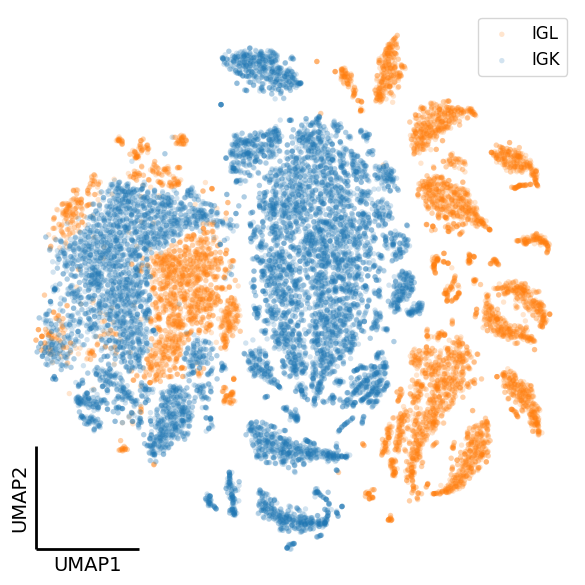

In [21]:
vl_locus = [l['locus'] for l in lights]
vl_order = natsorted(set(vl_locus))

plt.figure(figsize=[4, 4])

scatter(
    x=ltnse[:, 0],
    y=ltnse[:, 1],
    hue=vl_locus,
    hue_order=vl_order,
    # palette=sns.hls_palette(len(vl_order)),
    size=15,
    alpha=0.2,
    hide_legend=False,
    hide_cbar=True,
    xlabel='UMAP1',
    ylabel='UMAP2',
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    figsize=[6, 6],
    # show=True
    equal_axes=False,
    figfile='./tsne_balmMoE_light-test-seqs_locus-colored_scatterplot.pdf'
)
